<a href="https://colab.research.google.com/github/DebajyotiMitra007/TAI-IP/blob/main/Final(_NN_)project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout,BatchNormalization,GlobalAveragePooling2D,UpSampling2D


In [2]:
#Importing the Cifar 100 Dataset
cifar10 = tf.keras.datasets.cifar100
(X_train, Y_train), (X_test,Y_test) = cifar10.load_data()

169001437/169001437 [==============================] - 12s 0us/step


In [3]:
#Importing the Cifar 100 Dataset
cifar10 = tf.keras.datasets.cifar100
(X_train, Y_train), (X_test,Y_test) = cifar10.load_data()

from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(X_train, Y_train,test_size=0.2)

In [4]:
#Onehot encoding of the outputs
from keras.utils import to_categorical
y_train=to_categorical(y_train,num_classes=100)
y_val=to_categorical(y_val,num_classes=100)
y_test=to_categorical(Y_test,num_classes=100)
x_train = x_train*1.0/255
x_val = x_val*1.0/255
X_test = X_test*1.0/255
print(x_train.shape,x_val.shape,X_test.shape)
print(y_train.shape,y_val.shape,y_test.shape)

(40000, 32, 32, 3) (10000, 32, 32, 3) (10000, 32, 32, 3)
(40000, 100) (10000, 100) (10000, 100)


In [5]:
#Image Data Augmentation
train_datagen = ImageDataGenerator(
        rotation_range = 10,
        zoom_range = 0.1,
        width_shift_range = 0.1,
        height_shift_range = 0.1,
        shear_range = 0.1,
        horizontal_flip = True,
        vertical_flip = False
        )
train_datagen.fit(x_train)

In [6]:
#Reduce Learning Rate if accuracy is not improving for 3 epochs
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_accuracy',
    patience=3,
    verbose=1,
    factor=0.6,
    min_lr=1e-6)

In [7]:
#Importing the Inceptionv3 Model
from tensorflow.keras.applications import InceptionV3
inception_model = InceptionV3(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3)
)

for layer in inception_model.layers:
    if isinstance(layer, BatchNormalization):
        layer.trainable = True
    else:
        layer.trainable = False
inception_model.summary()
model=tf.keras.models.Sequential()
model.add(UpSampling2D(size=(7, 7),interpolation='bilinear'))
model.add(inception_model)
model.add(GlobalAveragePooling2D())
model.add(Dropout(.25))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(100, activation='softmax'))

87910968/87910968 [==============================] - 3s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activatio

In [9]:
from tensorflow.keras.optimizers import RMSprop
#model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

'''optimizer = RMSprop(
    learning_rate=0.001,
    rho=0.9,
    momentum=0.0,
    epsilon=1e-07,
    centered=False,)
result=model.fit(
    train_datagen.flow(x_train, y_train, batch_size = 16),
    validation_data = (x_val, y_val),
    epochs = 10,
    verbose = 1,
    callbacks = [learning_rate_reduction])



model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

result = model.fit(
    train_datagen.flow(x_train, y_train, batch_size=32),
    validation_data=(x_val, y_val),
    epochs=50,
    verbose=1,
    callbacks=[learning_rate_reduction]
)
'''





model.compile(
    optimizer=RMSprop(learning_rate=0.001, rho=0.9, momentum=0.0, epsilon=1e-7, centered=False),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

result = model.fit(
    train_datagen.flow(x_train, y_train, batch_size=32),
    validation_data=(x_val, y_val),
    epochs=20,
    verbose=1,
    callbacks=[learning_rate_reduction]
)


Epoch 1/20
1250/1250 [==============================] - 267s 199ms/step - loss: 2.3375 - accuracy: 0.4195 - val_loss: 1.5120 - val_accuracy: 0.5937 - lr: 0.0010
Epoch 2/20
1250/1250 [==============================] - 230s 184ms/step - loss: 1.5591 - accuracy: 0.5794 - val_loss: 1.2422 - val_accuracy: 0.6473 - lr: 0.0010
Epoch 3/20
1250/1250 [==============================] - 250s 200ms/step - loss: 1.3586 - accuracy: 0.6274 - val_loss: 1.1424 - val_accuracy: 0.6814 - lr: 0.0010
Epoch 4/20
1250/1250 [==============================] - 250s 200ms/step - loss: 1.2491 - accuracy: 0.6540 - val_loss: 1.0587 - val_accuracy: 0.7003 - lr: 0.0010
Epoch 5/20
1250/1250 [==============================] - 230s 184ms/step - loss: 1.1659 - accuracy: 0.6736 - val_loss: 0.9838 - val_accuracy: 0.7205 - lr: 0.0010
Epoch 6/20
1250/1250 [==============================] - 229s 183ms/step - loss: 1.1225 - accuracy: 0.6855 - val_loss: 0.9722 - val_accuracy: 0.7221 - lr: 0.0010
Epoch 7/20
1250/1250 [============

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 up_sampling2d (UpSampling2  (None, None, None, None   0         
 D)                          )                                   
                                                                 
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 batch_normalization_94 (Ba  (None, 256)               1

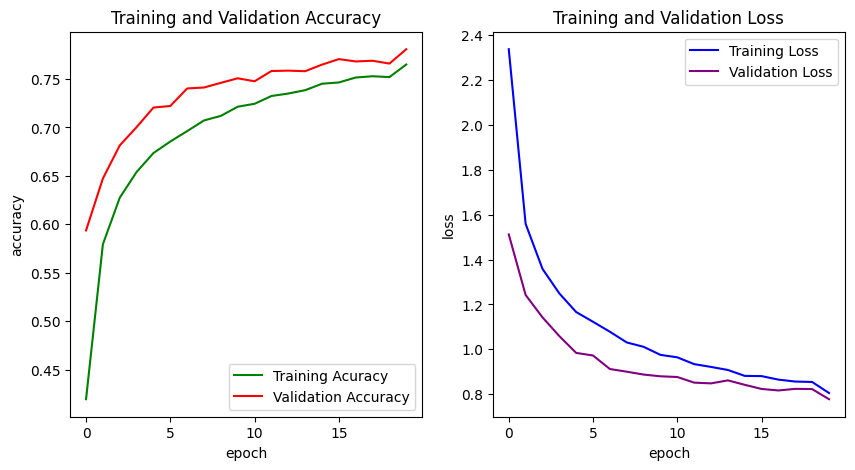

In [13]:
acc = result.history['accuracy']
val_acc = result.history['val_accuracy']
loss = result.history['loss']
val_loss = result.history['val_loss']

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Training and Validation Accuracy")
plt.plot(acc,color = 'green',label = 'Training Acuracy')
plt.plot(val_acc,color = 'red',label = 'Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.subplot(1, 2, 2)
plt.title('Training and Validation Loss')
plt.plot(loss,color = 'blue',label = 'Training Loss')
plt.plot(val_loss,color = 'purple',label = 'Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()

1/1 [==============================] - 0s 121ms/step
True Label: [6]
Predicted Label: 6


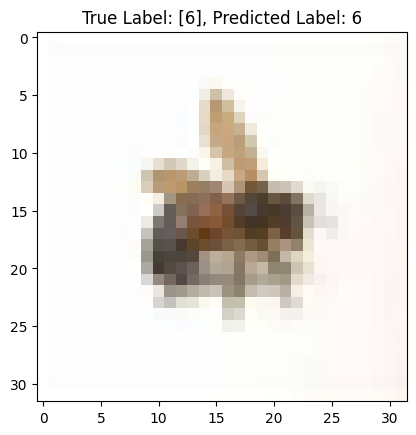

In [15]:

random_index = np.random.randint(0, len(X_test))
test_image = X_test[random_index]
true_label = Y_test[random_index]

# Reshape the image to fit the model input shape
test_image = np.reshape(test_image, (1, 32, 32, 3))

# Make a prediction using the trained model
prediction = model.predict(test_image)
predicted_label = np.argmax(prediction)


print(f"True Label: {true_label}")
print(f"Predicted Label: {predicted_label}")
plt.imshow(X_test[random_index])
plt.title(f"True Label: {true_label}, Predicted Label: {predicted_label}")
plt.show()
